<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.1/533.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=54c411289ab0ab8ec109e6afd33d47645779fddf2ee581e76009cf24ce7275b4
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-11-27 16:21:28
-------------------
qualified stocks: 87
with latest results: 25
still star stocks: 15
-------------------
Initial Investment:  1.26 C
CY Investment:  1.53 C
Reserve:  400.00
Current:  1.43 C
-------------------
Today PnL: -25.35 K (-0.18%)
Current PnL: -22.37 L (-14.66%)
CY Booked + Current PnL: -8.48 L (-5.56%)
-------------------
Total profit:  1.74 L
Total loss:  -24.11 L
-------------------
Total Booked + Current PnL: 18.50 L (14.73%)
Total Booked PnL: 40.87 L (32.53%)
Curr Year Booked PnL: 13.89 L (9.68%)
Prev Year Booked PnL: 26.98 L (21.48%)
Est FTT:  2.31 C
Est FTT PnL: 87.78 L (61.2%)
Deployed:  1.26 C
Current:  1.43 C
CAGR/XIRR %: 7.52%
Row successfully appended and saved to data/myPortfolioDB.csv.


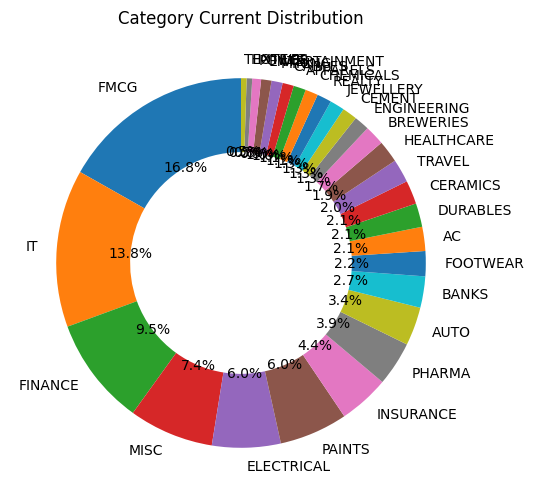

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
78,TTKPRESTIG,769.29,770.00,100.85,3.54,M-SC,50.0,86552.0,-14225.0,14316.0,...,-14.12,16.54,0.09,253.0,-0.99,0.60,13.71,OX40N,DURABLES,NTT
39,INDIGOPNTS,1407.73,1408.00,142.19,9.15,M-SC,67.0,158825.0,-15734.0,15771.0,...,-9.01,9.93,0.02,234.0,-1.00,1.11,38.15,OX40N,PAINTS,NTT
83,VOLTAS,1278.28,1530.00,-1.35,3.37,X-MC,54.0,209700.0,17958.0,19796.0,...,9.37,9.44,19.69,78.0,0.91,1.46,16.80,XY25,AC,NTT
43,ITC,409.28,452.00,-41.15,1.00,X-LC,46.0,197703.0,-2435.0,23329.0,...,-1.22,11.80,10.44,5.0,-0.10,1.38,4.28,X40,FMCG,NTT
52,MEDANTA,1197.64,1486.00,-4.04,5.56,X-SC,48.0,132500.0,5550.0,25016.0,...,4.37,18.88,24.08,89.0,0.22,0.92,24.85,XY24,HEALTHCARE,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,2379.51,3906.00,-54.13,1.49,X-SC,53.0,187020.0,-50931.0,203571.0,...,-21.40,108.85,64.15,82.0,-0.25,1.30,4.91,XY24,CEMENT,BTT
8,AWL,315.97,485.00,-59.93,3.74,X-MC,38.0,249589.0,-52162.0,213573.0,...,-17.29,85.57,53.50,58.0,-0.24,1.74,10.86,XY24,FMCG,NTT
61,REPCOHOME,463.60,880.00,-55.29,10.43,H-SC,49.0,255574.0,-30931.0,288262.0,...,-10.80,112.79,89.82,160.0,-0.11,1.78,35.22,XY24,FINANCE,NTT
10,BANDHANBNK,207.88,400.00,40.80,5.47,H-SC,37.0,200518.0,-78041.0,335487.0,...,-28.02,167.31,92.42,170.0,-0.23,1.40,15.88,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ABBOTINDIA,29969.40,35195.00,-15.34,4.27,X-MC,45.0,147200.0,-2647.0,28778.0,...,-1.77,19.55,17.44,63.0,-0.09,1.03,17.05,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-54.13,1.49,X-SC,53.0,187020.0,-50931.0,203571.0,...,-21.40,108.85,64.15,82.0,-0.25,1.30,4.91,XY24,CEMENT,BTT
5,ASIANPAINT,2861.00,3460.25,-0.35,14.54,X-LC,76.0,253361.0,1593.0,51154.0,...,0.63,20.19,20.95,31.0,0.03,1.77,36.49,X40,PAINTS,ATH
8,AWL,315.97,485.00,-59.93,3.74,X-MC,38.0,249589.0,-52162.0,213573.0,...,-17.29,85.57,53.50,58.0,-0.24,1.74,10.86,XY24,FMCG,NTT
9,BAJAJHFL,122.26,181.50,-20.09,7.32,X-MC,32.0,172774.0,-27732.0,124881.0,...,-13.83,72.28,48.45,64.0,-0.22,1.20,0.37,X40N,FINANCE,ATH
11,BATAINDIA,1550.24,2096.00,8.88,13.20,X-SC,24.0,83008.0,-45662.0,90960.0,...,-35.49,109.58,35.20,92.0,-0.50,0.58,0.00,X40,FOOTWEAR,NTT
12,BERGEPAINT,561.33,680.00,-5.51,4.16,X-MC,56.0,231194.0,3855.0,44204.0,...,1.70,19.12,21.14,74.0,0.09,1.61,30.31,XY24,PAINTS,NTT
15,CAMS,3816.00,4762.00,-2.58,1.96,X-SC,50.0,257030.0,5174.0,57266.0,...,2.05,22.28,24.79,86.0,0.09,1.79,25.67,X40N,MISC,NTT
17,COALINDIA,406.65,484.83,9.65,2.55,L-LC,49.0,139878.0,-10582.0,39502.0,...,-7.03,28.24,19.23,179.0,-0.27,0.98,12.75,XY25,MINING,ATH
19,COLPAL,2633.65,3726.84,-1.90,7.17,X-MC,44.0,217130.0,-46235.0,155552.0,...,-17.56,71.64,41.51,61.0,-0.30,1.51,1.89,XY25,FMCG,ATH


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.00,109.13,13.41,H-SC,57.0,141773.0,-76723.0,104912.0,...,-35.11,74.00,12.90,161.0,-0.73,0.99,17.88,OX40N,FINANCE,NTT
16,CERA,7647.97,9475.00,-29.83,5.03,H-SC,33.0,127834.0,-48069.0,90085.0,...,-27.33,70.47,23.89,157.0,-0.53,0.89,10.40,OX40N,CERAMICS,NTT
25,FINCABLES,789.54,1641.55,-22.17,10.57,M-SC,37.0,140933.0,-6711.0,166033.0,...,-4.55,117.81,107.91,216.0,-0.04,0.98,0.78,OX40N,CABLES,ATH
39,INDIGOPNTS,1407.73,1408.00,142.19,9.15,M-SC,67.0,158825.0,-15734.0,15771.0,...,-9.01,9.93,0.02,234.0,-1.00,1.11,38.15,OX40N,PAINTS,NTT
44,JCHAC,2282.24,2282.00,18834.78,1.42,M-SC,16.0,92574.0,-35231.0,35215.0,...,-27.57,38.04,-0.01,233.0,-1.00,0.65,4.83,OX40N,AC,NTT
47,KANSAINER,299.63,340.00,-67.53,1.47,H-SC,39.0,213057.0,-56610.0,92935.0,...,-20.99,43.62,13.47,158.0,-0.61,1.49,8.33,XY24,PAINTS,NTT
57,RAJESHEXPO,517.65,518.00,1708.08,1.22,L-SC,51.0,49346.0,-87831.0,87925.0,...,-64.03,178.18,0.07,268.0,-1.00,0.34,22.72,OX40N,JEWELLERY,NTT
64,SFL,1016.35,1287.00,18.67,5.45,M-SC,34.0,156748.0,-105470.0,175291.0,...,-40.22,111.83,26.63,239.0,-0.60,1.09,2.44,XY24,MISC,NTT
67,SIS,435.42,528.00,2078.24,3.78,H-SC,61.0,87911.0,-23121.0,46725.0,...,-20.82,53.15,21.26,166.0,-0.49,0.61,18.78,OX40N,MISC,NTT
71,SYMPHONY,1306.42,1306.00,-47.03,15.73,M-SC,35.0,113060.0,-58081.0,58022.0,...,-33.94,51.32,-0.03,206.0,-1.00,0.79,0.66,OX40N,DURABLES,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-54.13,1.49,X-SC,53.0,187020.0,-50931.0,203571.0,...,-21.40,108.85,64.15,82.0,-0.25,1.30,4.91,XY24,CEMENT,BTT
7,ATULAUTO,579.80,844.00,3440.54,4.05,M-SC,49.0,159052.0,-38080.0,127910.0,...,-19.32,80.42,45.57,244.0,-0.30,1.11,12.76,XY24,AUTO,NTT
8,AWL,315.97,485.00,-59.93,3.74,X-MC,38.0,249589.0,-52162.0,213573.0,...,-17.29,85.57,53.50,58.0,-0.24,1.74,10.86,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,40.80,5.47,H-SC,37.0,200518.0,-78041.0,335487.0,...,-28.02,167.31,92.42,170.0,-0.23,1.40,15.88,XY24,BANKS,NTT
12,BERGEPAINT,561.33,680.00,-5.51,4.16,X-MC,56.0,231194.0,3855.0,44204.0,...,1.70,19.12,21.14,74.0,0.09,1.61,30.31,XY24,PAINTS,NTT
14,CAMPUS,294.86,393.00,-25.94,2.98,M-SC,48.0,154313.0,-13462.0,69302.0,...,-8.02,44.91,33.28,222.0,-0.19,1.08,19.60,XY24,FOOTWEAR,NTT
17,COALINDIA,406.65,484.83,9.65,2.55,L-LC,49.0,139878.0,-10582.0,39502.0,...,-7.03,28.24,19.23,179.0,-0.27,0.98,12.75,XY25,MINING,ATH
19,COLPAL,2633.65,3726.84,-1.90,7.17,X-MC,44.0,217130.0,-46235.0,155552.0,...,-17.56,71.64,41.51,61.0,-0.30,1.51,1.89,XY25,FMCG,ATH
20,DABUR,511.48,735.00,-6.86,3.88,X-MC,55.0,251788.0,3720.0,104693.0,...,1.50,41.58,43.70,72.0,0.04,1.76,16.78,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-27.55,23.07,M-SC,19.0,69672.0,-107143.0,187940.0,...,-60.60,269.75,45.70,205.0,-0.57,0.49,0.14,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-38.17,5.77,H-MC,59.0,251544.0,-10075.0,129294.0,...,-3.85,51.40,45.57,120.0,-0.08,1.75,7.03,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-22.40,6.90,H-SC,28.0,73177.0,-27786.0,122315.0,...,-27.52,167.15,93.63,145.0,-0.23,0.51,9.00,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,7422.22,19.36,L-SC,54.0,82527.0,-11283.0,87900.0,...,-12.03,106.51,81.67,271.0,-0.13,0.58,59.82,XR,CERAMICS,NTT
13,BSOFT,551.58,831.70,-11.09,7.00,H-SC,54.0,97678.0,-42975.0,114410.0,...,-30.55,117.13,50.79,151.0,-0.38,0.68,13.73,XR,IT,ATH
18,COFFEEDAY,59.14,80.00,-53.72,16.76,L-SC,36.0,69715.0,-43834.0,83881.0,...,-38.60,120.32,35.27,270.0,-0.52,0.49,70.63,XR,HOTELS,NTT
21,DEN,52.79,75.00,81.35,8.16,M-SC,47.0,51248.0,-33216.0,68754.0,...,-39.33,134.16,42.07,235.0,-0.48,0.36,8.83,AR,ENTERTAINMENT,NTT
29,HAPPSTMNDS,801.03,1480.71,-26.17,14.27,H-SC,42.0,79560.0,-48605.0,157354.0,...,-37.92,197.78,84.85,147.0,-0.31,0.55,2.11,AR,IT,ATH
30,HATHWAY,18.12,31.40,809.42,5.11,H-SC,39.0,78360.0,-30360.0,110041.0,...,-27.92,140.43,73.29,172.0,-0.28,0.55,4.82,XR,ENTERTAINMENT,NTT
37,IEX,147.35,219.00,-36.48,15.62,H-SC,52.0,191201.0,-8753.0,105983.0,...,-4.38,55.43,48.63,136.0,-0.08,1.33,6.67,XR,MISC,NTT
38,INDIAMART,2327.09,4810.62,-50.63,3.10,H-SC,37.0,123124.0,-212.0,131841.0,...,-0.17,107.08,106.72,139.0,-0.00,0.86,23.17,AR,MISC,ATH


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.85
1,20,37.12
2,30,51.79


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.52
MC,29.21
LC,25.28


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,27.81
X40,21.26
X40N,11.92
XR,9.53
XY25,9.12
AR,9.08
OX40N,7.65
X200,1.89
SR,0.98


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,23.91
X-MC,22.73
X-LC,20.05
M-SC,11.92
X-SC,8.28
H-MC,4.75
H-LC,3.04
L-SC,1.41
M-MC,1.39


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
X40,X-MC,9.53
XY24,H-SC,9.48
X40,X-LC,9.32
XR,H-SC,5.74
XY24,M-SC,5.64
X40N,X-MC,5.12
XY24,X-MC,5.11
OX40N,M-SC,4.13
XY25,X-LC,3.78


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,16.82,-4.40,38.16
IT,13.79,-14.33,73.35
FINANCE,9.46,-14.29,62.58
MISC,7.41,-22.18,72.23
ELECTRICAL,5.99,-9.08,49.03
PAINTS,5.98,-7.81,23.83
INSURANCE,4.42,0.37,34.75
PHARMA,3.88,-0.50,32.67
AUTO,3.36,-19.09,70.15


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,73.15,10489411.0,-10.36,-1087138.0,49.89,5233252.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,58.02,8319412.0,-5.18,-430808.0,38.74,3222910.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3047543.0
XR,1296761.0
AR,1267606.0
X40,992483.0
X40N,738526.0
OX40N,694315.0
XY25,333808.0
SR,280244.0
MH,73531.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3548821.0
M-SC,1350439.0
X-MC,1223052.0
X-LC,889641.0
X-SC,731574.0
H-MC,395869.0
L-SC,259706.0
H-LC,120892.0
M-LC,118462.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1212666.0
AR        H-SC           872480.0
XR        H-SC           792867.0
XY24      M-SC           780401.0
X40       X-MC           438952.0
          X-LC           389251.0
XY24      X-MC           362470.0
OX40N     H-SC           317033.0
X40N      X-SC           292646.0
OX40N     M-SC           289357.0
SR        H-SC           280244.0
XY24      X-SC           274648.0
X40N      X-MC           246282.0
XY24      X-LC           227898.0
AR        H-MC           206409.0
X40N      X-LC           199598.0
XY24      H-MC           189460.0
XY25      X-MC           175348.0
XR        L-SC           171781.0
X40       X-SC           164280.0
XR        M-SC           159928.0
AR        M-SC           120753.0
XR        M-LC           118462.0
OX40N     L-SC            87925.0
MH        H-SC            73531.0
XY25      X-LC            72894.0
AR        H-LC            67964.0
XR        L-MC            53723.0
X200      H-LC            52928.0
XY25      M-MC            46064.0
          L-LC            39502.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
X-MC,16
M-SC,15
X-LC,11
X-SC,8
H-MC,3
L-SC,3
H-LC,2
L-LC,1
